# **Regresión Lineal 2**

**Héctor Manuel Cárdenas Yáñez - A01634615**

Instrucciones:
Descarga la base de datos titulada "breast_cancer" disponible en canvas. Dicha base de datos contiene información sobre las características de diversos tumores.

Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor. Las variables regresoras de tu modelo deben de ser todas las variables de la base de datos.

In [133]:
# Importar Librerias

import numpy as np
import pandas as pd
from scipy.stats import t, f
import matplotlib.pyplot as plt                         # Para graficar
import statsmodels.formula.api as smf                   # Para el modelo de pruebas
from sklearn.preprocessing import StandardScaler        # Para estandarizar los datos
from sklearn.model_selection import train_test_split    # Para dividir la base de datoa

## Paso # 1

Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

In [134]:
# Descargamos los datos en un df
df = pd.read_csv('/content/breast_cancer.csv')

# Eliminar las columnas 'id' 'diagnosis'
df.drop(['id'], axis = 1, inplace = True)

# Incluir 'diagnosis' como variable predictora
dummies = pd.get_dummies(df['diagnosis'], prefix='diagnosis')
df = pd.concat([df, dummies], axis=1)
df.drop('diagnosis', axis=1, inplace=True)

# Renombrar variables para la regresión
df.rename(columns={'concave points_mean':'concave_points_mean'}, inplace=True)
df.rename(columns={'concave points_se':'concave_points_se'}, inplace=True)
df.rename(columns={'concave points_worst':'concave_points_worst'}, inplace=True)

# Imprimir primeras 5 filas
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [135]:
# Imprimir valores faltantes por columna
print(bc_df.isnull().sum())

# Imprimir valores faltantes en total
print('Total de valores faltantes:', bc_df.isnull().sum().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_B                0
diagnosis_M                0
dtype: int64
Total de valores faltantes: 0


## Paso # 2
Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

In [136]:
# Checar la correlación de las variables regresoras

correlacion = df.corr()
alta_correlacion = np.where((correlacion > 0.95) & (correlacion < 1))
alta_correlacion

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

In [137]:
# Estandarizar los datos
scaler = StandardScaler()
df_standard = scaler.fit_transform(df)
df_standard = pd.DataFrame(df_standard, columns=df.columns)
df_standard

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676,1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676,1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676,1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676,1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676,1.297676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,-1.297676,1.297676
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,-1.297676,1.297676
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-1.297676,1.297676
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,-1.297676,1.297676


Implementamos un modelo de Regresión Lineal Múltiple para predecir el radio del tumor

In [138]:
# Dividir los datos en conjuntos de entrenamiento y prueba
entrenamiento, prueba = train_test_split(df, test_size=0.20, random_state=42)

# Modelo inicial
modelo = smf.ols(formula='''radius_mean ~ texture_mean + perimeter_mean + area_mean
                            + smoothness_mean + compactness_mean + concavity_mean
                            + concave_points_mean + symmetry_mean + fractal_dimension_mean
                            + radius_se + texture_se + perimeter_se + area_se + smoothness_se
                            + compactness_se + concavity_se + concave_points_se + symmetry_se
                            + fractal_dimension_se + radius_worst + texture_worst
                            + perimeter_worst + area_worst + smoothness_worst
                            + compactness_worst + concavity_worst + concave_points_worst
                            + symmetry_worst + fractal_dimension_worst + diagnosis_B
                            + diagnosis_M''', data=entrenamiento)

modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.787e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:10   Log-Likelihood:                 672.50
No. Observations:                 455   AIC:                            -1283.
Df Residuals:                     424   BIC:                            -1155.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Paso # 3
**Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.**

**Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo**

Pese a que el resumen de resultados de la regresión linear anterior muestra el estadístico t y el p-valor, se llevó a cabo una prueba t de hipotesis nula para cada uno de los coeficientes de la regresión.

Debido a que estamos buscando un nivel de confianza de 95%, un p-valor menor a 0.05 quiere decir que la variable predictora afecta significativamente a la variable de resupuesta, como resultado debemos de rechazar la hipótesis nula. Esto significa que no puede excluirse del modelo.

In [139]:
# Crear Data Frame para almacenar los resultados de las pruebas
pt_df = pd.DataFrame(columns=['H0', 'Estadístico T', 'P-Valor', 'Rechazo de H0'])

# Prueba de hipótesis nula para T de Student
for i in df.columns[1:]:
  h_0 = i + ' = 0'
  prueba_t = modelo.t_test(h_0)
  pt_df.loc[len(pt_df.index)] = [h_0, np.round(prueba_t.tvalue[0][0], 4), np.round(prueba_t.pvalue, 4), True if prueba_t.pvalue < 0.05 else False]

# Imprimir Data Frame
pt_df

,H0,Estadístico T,P-Valor,Rechazo de H0
0,texture_mean = 0,-0.5775,0.5639,False
1,perimeter_mean = 0,51.5944,0.0000,True
2,area_mean = 0,5.6111,0.0000,True
3,smoothness_mean = 0,2.9744,0.0031,True
4,compactness_mean = 0,-12.0612,0.0000,True
5,concavity_mean = 0,-5.4046,0.0000,True
6,concave_points_mean = 0,-0.2598,0.7951,False
7,symmetry_mean = 0,2.1624,0.0311,True
8,fractal_dimension_mean = 0,2.6730,0.0078,True
9,radius_se = 0,1.1366,0.2563,False


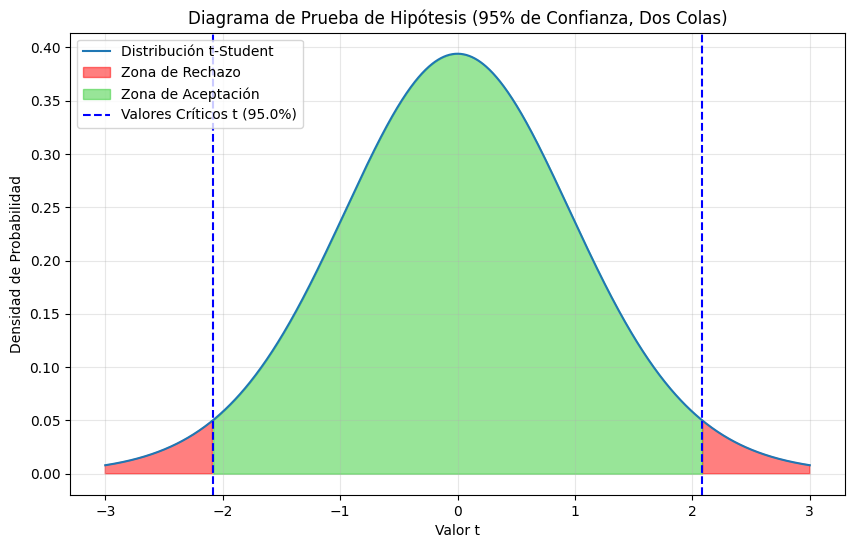

In [140]:
# Nivel de confianza (porcentaje)
confianza = 0.95

# Grados de libertad
grados_libertad = 20

# Valor crítico t para el nivel de confianza dado y los grados de libertad
alpha = 1 - confianza
valor_critico = t.ppf(1 - alpha / 2, df=grados_libertad)

# Rango de valores t
x = np.linspace(-3, 3, 1000)
y = t.pdf(x, df=grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución t-Student')

# Zona de rechazo (dos colas)
plt.fill_between(x, 0, y, where=(x >= valor_critico) | (x <= -valor_critico), color='red', alpha=0.5, label='Zona de Rechazo')
plt.fill_between(x, 0, y, where=(x > -valor_critico) & (x < valor_critico), color='limegreen', alpha=0.5, label='Zona de Aceptación')

# Marcar los valores críticos t
plt.axvline(x=valor_critico, color='blue', linestyle='--', label=f'Valores Críticos t ({confianza*100}%)')
plt.axvline(x=-valor_critico, color='blue', linestyle='--')

plt.legend(loc='upper left')
plt.title('Diagrama de Prueba de Hipótesis (95% de Confianza, Dos Colas)')
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True, alpha=0.3)
plt.show()

## Paso # 4
**Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.**

De manera similar, se hizo una prueba de fisher para evaluar la significancia del estadística del modelo. Se implemento el mismo razonamiento para determinar si las variables predictoras afetan significativamente a la variable de respuesta. Para calcular y graficar los valores críticos se utilizaron los mismos grados de libertad para el numerador y denominador que calcula la función 'f_test()'.

In [141]:
# Generar hipótesis nula
h_0 = '''texture_mean = perimeter_mean = area_mean
         = smoothness_mean = compactness_mean = concavity_mean
         = concave_points_mean = symmetry_mean = fractal_dimension_mean
         = radius_se = texture_se = perimeter_se = area_se = smoothness_se
         = compactness_se = concavity_se = concave_points_se = symmetry_se
         = fractal_dimension_se = radius_worst = texture_worst
         = perimeter_worst = area_worst = smoothness_worst
         = compactness_worst = concavity_worst = concave_points_worst
         = symmetry_worst = fractal_dimension_worst = diagnosis_B
         = diagnosis_M = 0'''

# Prueba F-Fisher para calcular la significancia del modelo
prueba_f = modelo.f_test(h_0)

# Crear Data Frame para almacenar los resultados de la prueba
pf_df = pd.DataFrame(columns=['H0', 'Estadístico F', 'P-Valor', 'Rechazo de H0'])
pf_df.loc[len(pf_df.index)] = [h_0, round(prueba_f.fvalue, 4), np.round(prueba_f.pvalue, 4), True if prueba_f.pvalue < 0.05 else False]

# Imprimir Data Frame
pf_df

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 30
  warnings.warn('covariance of constraints does not have full '


,H0,Estadístico F,P-Valor,Rechazo de H0
0,texture_mean = perimeter_mean = area_mean\n ...,982648.8539,0.0,True


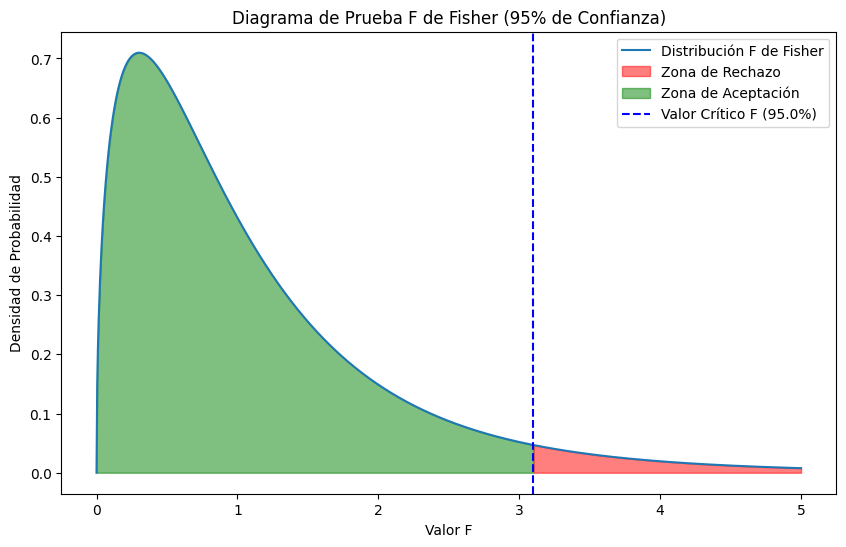

In [142]:
# Nivel de confianza (95%)
confianza = 0.95

# Grados de libertad del numerador y denominador (ajusta según tu modelo)
grados_libertad_numerador = 3  # Cambia según tu modelo
grados_libertad_denominador = 20  # Cambia según tus datos y modelo

# Valor crítico F para el nivel de confianza dado y los grados de libertad
valor_critico = f.ppf(confianza, dfn=grados_libertad_numerador, dfd=grados_libertad_denominador)

# Crear una distribución F de Fisher
x = np.linspace(0, 5, 1000)
y = f.pdf(x, dfn=grados_libertad_numerador, dfd=grados_libertad_denominador)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución F de Fisher')
plt.fill_between(x, 0, y, where=(x >= valor_critico), color='red', alpha=0.5, label='Zona de Rechazo')
plt.fill_between(x, 0, y, where=(x < valor_critico), color='green', alpha=0.5, label='Zona de Aceptación')

# Marcar el valor crítico F
plt.axvline(x=valor_critico, color='blue', linestyle='--', label=f'Valor Crítico F ({confianza*100}%)')

# Etiquetas y leyenda
plt.title('Diagrama de Prueba F de Fisher (95% de Confianza)')
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar el gráfico
plt.show()

## Paso # 5
Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

In [143]:
# Dividimos la base de datos

entrenamiento, prueba = train_test_split(df, test_size = 0.20, random_state = 42)

In [144]:
# Creamos el modelo

modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.987e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 671.98
No. Observations:                 455   AIC:                            -1284.
Df Residuals:                     425   BIC:                            -1160.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [145]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa

modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.210e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 671.79
No. Observations:                 455   AIC:                            -1286.
Df Residuals:                     426   BIC:                            -1166.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [146]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa

modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.453e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 671.72
No. Observations:                 455   AIC:                            -1287.
Df Residuals:                     427   BIC:                            -1172.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [147]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa

modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.702e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 671.23
No. Observations:                 455   AIC:                            -1288.
Df Residuals:                     428   BIC:                            -1177.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [148]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.982e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 671.09
No. Observations:                 455   AIC:                            -1290.
Df Residuals:                     429   BIC:                            -1183.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [149]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.266e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 670.34
No. Observations:                 455   AIC:                            -1291.
Df Residuals:                     430   BIC:                            -1188.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [150]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.589e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:12   Log-Likelihood:                 670.00
No. Observations:                 455   AIC:                            -1292.
Df Residuals:                     431   BIC:                            -1193.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [151]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.943e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:12   Log-Likelihood:                 669.76
No. Observations:                 455   AIC:                            -1294.
Df Residuals:                     432   BIC:                            -1199.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [152]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.310e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:12   Log-Likelihood:                 668.91
No. Observations:                 455   AIC:                            -1294.
Df Residuals:                     433   BIC:                            -1203.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [153]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.693e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:12   Log-Likelihood:                 667.53
No. Observations:                 455   AIC:                            -1293.
Df Residuals:                     434   BIC:                            -1207.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [154]:
# Si el p-valor para una variable es mayor o igual a 0.05, se considera que la variable no es estadísticamente significativa
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.118e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:12   Log-Likelihood:                 666.21
No. Observations:                 455   AIC:                            -1292.
Df Residuals:                     435   BIC:                            -1210.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [155]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.640e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:12   Log-Likelihood:                 666.04
No. Observations:                 455   AIC:                            -1294.
Df Residuals:                     436   BIC:                            -1216.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [156]:
# Encontramos la aproximacion en 'y'

y_aprox = 0 + 0.9462*prueba['perimeter_mean'] +  0.0740*prueba['area_mean'] + 0.0075*prueba['smoothness_mean'] - 0.0594*prueba ['compactness_mean'] -0.0348*prueba['concavity_mean'] + 0.0034*prueba['symmetry_mean']+ 0.0073*prueba['fractal_dimension_mean']-0.0116*prueba['perimeter_se'] +0.0117*prueba['concavity_se'] +0.0038*prueba['symmetry_se'] + 0.2351*prueba['radius_worst'] - 0.1218*prueba['perimeter_worst'] - 0.0819*prueba['area_worst'] - 0.0046*prueba['smoothness_worst'] + 0.0152*prueba['compactness_worst'] + 0.0056*prueba['concave_points_worst'] - 0.0041*prueba['symmetry_worst'] - 0.0061*prueba['fractal_dimension_worst']

In [157]:
# Lo convertimos a tabla

tabla = pd.DataFrame({'Real': prueba['radius_mean'], 'Prediccion': y_aprox, 'Errores': prueba['radius_mean']-y_aprox})
tabla

,Real,Prediccion,Errores
204,12.47,48.654478,-36.184478
70,18.94,33.313864,-14.373864
131,15.46,46.242093,-30.782093
431,12.40,61.542306,-49.142306
540,11.54,56.217769,-44.677769
...,...,...,...
486,14.64,61.306126,-46.666126
75,16.07,47.742821,-31.672821
249,11.52,52.783599,-41.263599
238,14.22,62.356123,-48.136123


## Paso # 6
Comparación entre datos reales y predicción. Análisis de los resultados.

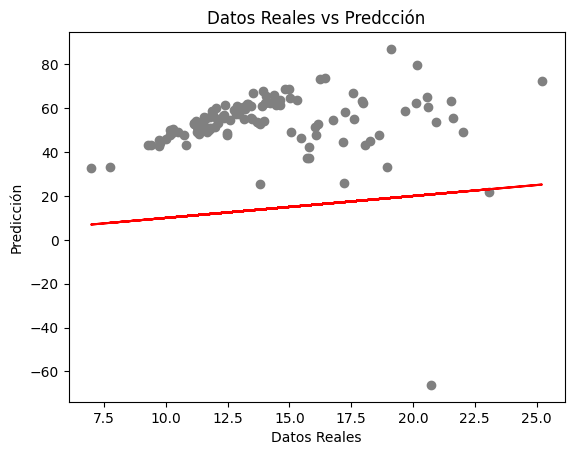

In [158]:
# Graficamos los datos reales contra la predicción

plt.scatter(prueba['radius_mean'], y_aprox, color='gray')
plt.plot(prueba['radius_mean'], prueba['radius_mean'], color = 'red')
plt.title('Datos Reales vs Predcción')
plt.xlabel('Datos Reales')
plt.ylabel('Predicción')

plt.show()

 Considero que el modelo si funciona. La desviación de los valores reales a comparación de los errores es muy baja. La gráfica demuestra esto visualmente, donde podemos ver que el modelo si se acopla a los datos.

## Paso # 7
Convertir el documento a PDF

In [159]:
# Guardar en Drive como PDF
!apt-get install -y texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/RegresiónLineal2.ipynb' --output-dir='/content/drive/MyDrive/Colab Notebooks'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/RegresiónLineal2.ipynb to pdf
[NbConvertApp] Writing 86962 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 88057 bytes to /content/drive/MyDrive/Colab Notebooks/RegresiónLineal2.pdf
